# Árvore de Regressão - Dados da Covid-19

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.model_selection import TimeSeriesSplit

pd.set_option('display.max_rows',10000) #para muitas linhas 
dados = pd.read_csv('C:/Users/Annie/Pictures/060720/dadocaso1.csv')
dados.data = pd.to_datetime(dados.data) #transformou o dado em data
dados.set_index('data',inplace = True) #tornou a data como indice
dados.head()

,casos
data,
2020-02-15,4
2020-02-16,1
2020-02-17,4
2020-02-18,3
2020-02-19,6


In [2]:
import numpy as np #MAPE 

def mean_absolute_percentage_error(y_true, y_pred): 
    # y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) /(y_true))) * 100

#mean_absolute_percentage_error(dados.casos, dados.naive)

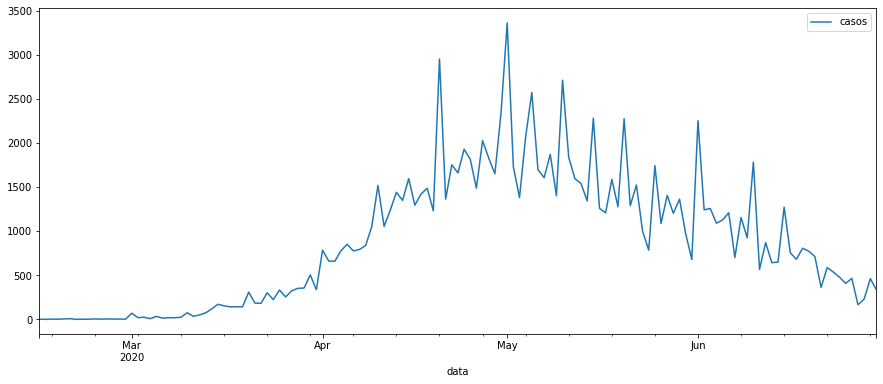

In [3]:
dados.plot(figsize = (15,6)) 

In [4]:
p = 5
dados1 = dados.copy()
for i in range(p):
    dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
dados1.dropna(axis=0, inplace=True)
dados1.head()

,casos,x_1,x_2,x_3,x_4,x_5
data,,,,,,
2020-02-20,9,6.0,3.0,4.0,1.0,4.0
2020-02-21,1,9.0,6.0,3.0,4.0,1.0
2020-02-22,3,1.0,9.0,6.0,3.0,4.0
2020-02-23,3,3.0,1.0,9.0,6.0,3.0
2020-02-24,6,3.0,3.0,1.0,9.0,6.0


In [5]:
X = dados1.drop('casos', axis=1) #
y = dados1.casos

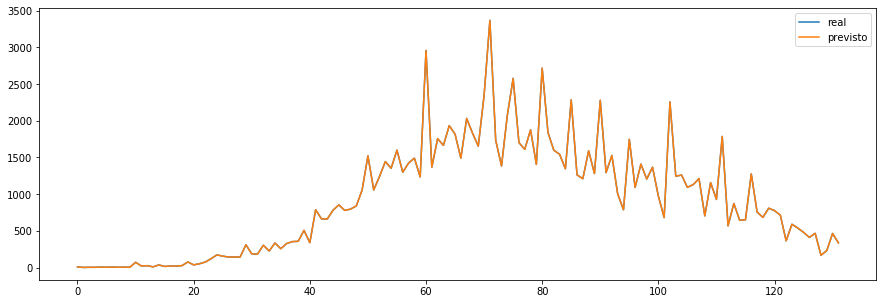

In [6]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X, y)

plt.figure(figsize=(15, 5))
plt.plot(dados1.casos.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto']) #estão apresentando iguais.. erro?

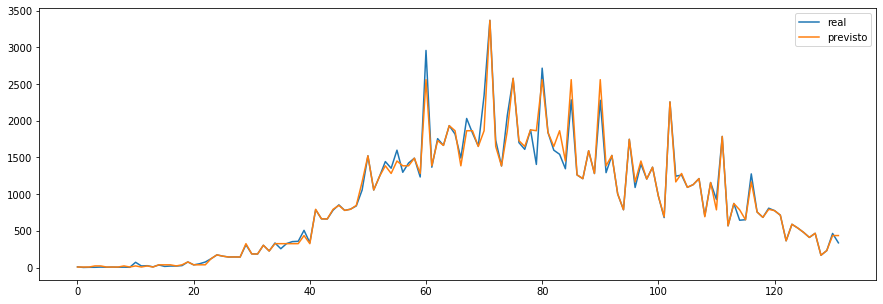

In [7]:
reg = DecisionTreeRegressor(max_depth=7) #parametro para profundidade da árvore
reg.fit(X, y)

plt.figure(figsize=(15, 5))
plt.plot(dados1.casos.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto']) 

In [8]:
dados1['month'] = dados1.index.month
dados1.head()

,casos,x_1,x_2,x_3,x_4,x_5,month
data,,,,,,,
2020-02-20,9,6.0,3.0,4.0,1.0,4.0,2
2020-02-21,1,9.0,6.0,3.0,4.0,1.0,2
2020-02-22,3,1.0,9.0,6.0,3.0,4.0,2
2020-02-23,3,3.0,1.0,9.0,6.0,3.0,2
2020-02-24,6,3.0,3.0,1.0,9.0,6.0,2


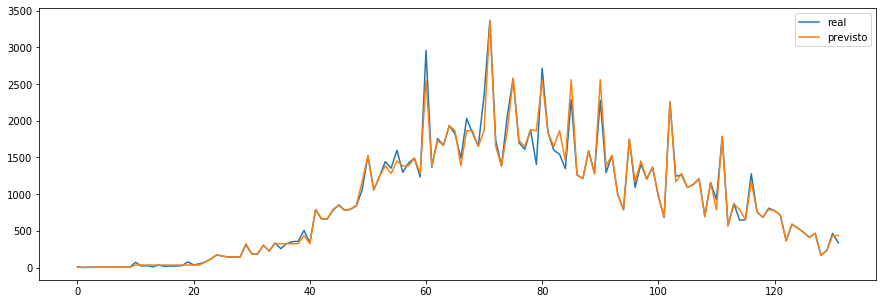

In [9]:
X = dados1.drop('casos', axis=1)
y = dados1.casos
reg = DecisionTreeRegressor(max_depth=7)
reg.fit(X, y)
plt.figure(figsize=(15, 5))
plt.plot(dados1.casos.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

In [10]:
#Com validação
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=7)
reg.fit(X_train, y_train)

((y_test - reg.predict(X_test)) ** 2).mean()

375988.5451767677

In [11]:
p = 1#numero de lags a considerar
max_depth = 10


dados1 = dados[['casos']].copy()
for i in range(p):
    dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
    dados1[f'M_{2}'] = dados1.casos.rolling(window=2).mean()

dados1.dropna(axis=0, inplace=True)

X = dados1.drop('casos', axis=1)
y = dados1.casos
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=max_depth)
reg.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, reg.predict(X_test))

22.966149671959755

In [12]:
dados1.tail() # a variavel exogena é o mês

,casos,x_1,M_2
data,,,
2020-06-26,466,410.0,438.0
2020-06-27,167,466.0,316.5
2020-06-28,231,167.0,199.0
2020-06-29,464,231.0,347.5
2020-06-30,336,464.0,400.0


In [13]:
#periodo_futuro = dados1.index[-1] + np.timedelta64(1, 'D')
#X_new = [list(np.flip(dados1.casos.tail.values, axis=0)) + [periodo_futuro.day]]
#X_new

X_new = [[336,464]]
X_new

[[336, 464]]

In [14]:
reg.predict(X_new)

array([506.])

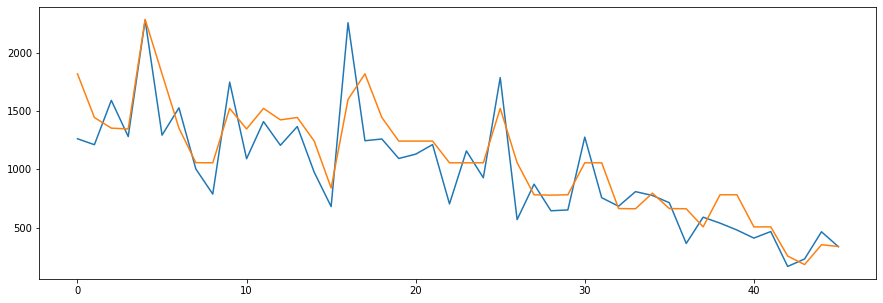

In [15]:
plt.figure(figsize=(15 ,5))
plt.plot(y_test.values)
plt.plot(reg.predict(X_test))


In [16]:
p = 2 #numero de lags a considerar
max_depth = 7

dados1 = dados[['casos']].copy()
for i in range(p):
    dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
dados1.dropna(axis=0, inplace=True)
dados1['month'] = dados1.index.month

X = dados1.drop('casos', axis=1)
y = dados1.casos
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=max_depth)
reg.fit(X_train, y_train)
((y_test - reg.predict(X_test)) ** 2).mean()

399410.7975308642

In [17]:
p = 4 #numero de lags a considerar
max_depth = 7

dados1 = dados[['casos']].copy()
for i in range(p):
    dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
dados1.dropna(axis=0, inplace=True)
dados1['month'] = dados1.index.month

X = dados1.drop('casos', axis=1)
y = dados1.casos
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=max_depth)
reg.fit(X_train, y_train)
((y_test - reg.predict(X_test)) ** 2).mean()

218564.3777777778

In [18]:
p = 5 #numero de lags a considerar
max_depth = 7

dados1 = dados[['casos']].copy()
for i in range(p):
    dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
dados1.dropna(axis=0, inplace=True)
dados1['month'] = dados1.index.month

X = dados1.drop('casos', axis=1)
y = dados1.casos
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=max_depth)
reg.fit(X_train, y_train)
((y_test - reg.predict(X_test)) ** 2).mean()

385701.86335858586

In [19]:
p = 6 #numero de lags a considerar
max_depth = 7

dados1 = dados[['casos']].copy()
for i in range(p):
    dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
dados1.dropna(axis=0, inplace=True)
#dados1['month'] = dados1.index.month

X = dados1.drop('casos', axis=1)
y = dados1.casos
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=max_depth)
reg.fit(X_train, y_train)
((y_test - reg.predict(X_test)) ** 2).mean()

379996.4890909091

In [20]:
p = (1,2,3,4,5,6,7,8,9,10)#numero de lags a considerar
max_depth = (1,2,3,4,5,6,7,8,9,10)

for n in p:
    for j in max_depth:
        dados1 = dados[['casos']].copy()
        for i in range(n):
            dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
        dados1.dropna(axis=0, inplace=True)
        #dados1['month'] = dados1.index.month

        X = dados1.drop('casos', axis=1)
        y = dados1.casos
        train_size = int(len(X) * 2/3)
        X_train = X[:train_size]
        X_test = X[train_size:]
        y_train = y[:train_size]
        y_test = y[train_size:]

        reg = DecisionTreeRegressor(max_depth=j)
        reg.fit(X_train, y_train)
        #erro = ((y_test - reg.predict(X_test)) ** 2).mean()
        erro = mean_absolute_percentage_error(y_test, reg.predict(X_test))
        print(f'P = {n} e Max_depth = {j} : {erro}')
       
     

P = 1 e Max_depth = 1 : 64.71885250206641
P = 1 e Max_depth = 2 : 61.0833708542941
P = 1 e Max_depth = 3 : 63.89116222144331
P = 1 e Max_depth = 4 : 63.525531341197485
P = 1 e Max_depth = 5 : 60.04616077414785
P = 1 e Max_depth = 6 : 65.7532480025191
P = 1 e Max_depth = 7 : 63.57185564889109
P = 1 e Max_depth = 8 : 63.5418204549059
P = 1 e Max_depth = 9 : 63.60777900683022
P = 1 e Max_depth = 10 : 63.78298657758283
P = 2 e Max_depth = 1 : 64.37697536120943
P = 2 e Max_depth = 2 : 54.555180412285765
P = 2 e Max_depth = 3 : 52.65344984195779
P = 2 e Max_depth = 4 : 51.338067472894664
P = 2 e Max_depth = 5 : 46.23938686613815
P = 2 e Max_depth = 6 : 51.00175127188673
P = 2 e Max_depth = 7 : 50.8587384426173
P = 2 e Max_depth = 8 : 51.0549645226267
P = 2 e Max_depth = 9 : 51.30337162774362
P = 2 e Max_depth = 10 : 51.779297674180704
P = 3 e Max_depth = 1 : 64.17569202419563
P = 3 e Max_depth = 2 : 54.52816940540972
P = 3 e Max_depth = 3 : 53.65428891707044
P = 3 e Max_depth = 4 : 52.817890

In [21]:
media = (1,2,3,4,5,6,7,8,9,10,11,12,13) #média móvel
max_depth = (1,2,3,4,5,6,7,8,9,10,)

for n in media:
    for j in max_depth:
        dados1 = dados[['casos']].copy()
        for i in range(n):
            dados1[f'M_{i+2}'] = dados1.casos.rolling(window=i+2).mean()
        dados1.dropna(axis=0, inplace=True)

        X = dados1.drop('casos', axis=1)
        y = dados1.casos
        train_size = int(len(y) * 2/3)
        X_train = X[:train_size]
        X_test = X[train_size:]
        y_train = y[:train_size]
        y_test = y[train_size:]
    
    
        reg = DecisionTreeRegressor(max_depth=j)
        reg.fit(X_train, y_train)
        erro = mean_absolute_percentage_error(y_test, reg.predict(X_test))
        print(f'Média_dias = {n+1} e Max_depth = {j} : {erro}')
        
    
       

Média_dias = 2 e Max_depth = 1 : 55.95942601698782
Média_dias = 2 e Max_depth = 2 : 38.068824819231075
Média_dias = 2 e Max_depth = 3 : 29.28038054382847
Média_dias = 2 e Max_depth = 4 : 27.864707230998388
Média_dias = 2 e Max_depth = 5 : 27.043125721684113
Média_dias = 2 e Max_depth = 6 : 27.89585593805229
Média_dias = 2 e Max_depth = 7 : 26.948860148786935
Média_dias = 2 e Max_depth = 8 : 26.642450603465363
Média_dias = 2 e Max_depth = 9 : 26.465304781732986
Média_dias = 2 e Max_depth = 10 : 26.541767830104497
Média_dias = 3 e Max_depth = 1 : 59.89080551662991
Média_dias = 3 e Max_depth = 2 : 44.40027427037609
Média_dias = 3 e Max_depth = 3 : 30.333497090535026
Média_dias = 3 e Max_depth = 4 : 30.58650655649668
Média_dias = 3 e Max_depth = 5 : 26.360544903955414
Média_dias = 3 e Max_depth = 6 : 26.625652167744295
Média_dias = 3 e Max_depth = 7 : 27.118408285748234
Média_dias = 3 e Max_depth = 8 : 32.94622968648935
Média_dias = 3 e Max_depth = 9 : 28.692015454351555
Média_dias = 3 e M

In [22]:
#média móvel e lags
p = (1,2,3,4,5,6,7,8,9,10,11,12,13,14) 
max_depth = (1,2,3,4,5,6,7,8,9,10)

for n in p:
    for j in max_depth:
        dados1 = dados[['casos']].copy()
        for i in range(n):
            dados1[f'x_{i+1}'] = dados1.casos.shift(i + 1)
        dados1[f'M_{i+2}'] = dados1.casos.rolling(window=i+2).mean()
        dados1.dropna(axis=0, inplace=True)
        
        X = dados1.drop('casos', axis=1)
        y = dados1.casos
        train_size = int(len(y) * 2/3)
        X_train = X[:train_size]
        X_test = X[train_size:]
        y_train = y[:train_size]
        y_test = y[train_size:]
        print()
        
        reg = DecisionTreeRegressor(max_depth=j)
        reg.fit(X_train, y_train)
        erro = mean_absolute_percentage_error(y_test, reg.predict(X_test))
        print(f'P= {n}, Média_dias = {n+1} e Max_depth= {j} : {erro}')
        
  


P= 1, Média_dias = 2 e Max_depth= 1 : 55.95942601698782

P= 1, Média_dias = 2 e Max_depth= 2 : 38.068824819231075

P= 1, Média_dias = 2 e Max_depth= 3 : 29.28038054382847

P= 1, Média_dias = 2 e Max_depth= 4 : 26.53423558122203

P= 1, Média_dias = 2 e Max_depth= 5 : 26.97005841520845

P= 1, Média_dias = 2 e Max_depth= 6 : 23.930581394353155

P= 1, Média_dias = 2 e Max_depth= 7 : 26.554497616650753

P= 1, Média_dias = 2 e Max_depth= 8 : 23.546331383280812

P= 1, Média_dias = 2 e Max_depth= 9 : 26.289845363765206

P= 1, Média_dias = 2 e Max_depth= 10 : 26.342315509901493

P= 2, Média_dias = 3 e Max_depth= 1 : 59.89080551662991

P= 2, Média_dias = 3 e Max_depth= 2 : 38.48646147736601

P= 2, Média_dias = 3 e Max_depth= 3 : 32.913040332086936

P= 2, Média_dias = 3 e Max_depth= 4 : 34.46945936114487

P= 2, Média_dias = 3 e Max_depth= 5 : 31.964696452622025

P= 2, Média_dias = 3 e Max_depth= 6 : 36.08910520547741

P= 2, Média_dias = 3 e Max_depth= 7 : 32.935116027816235

P= 2, Média_dias = 3